1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np
m = np.arange(12).reshape((3,4))
total_mean = m.mean()

row_means = [m[i,:].mean() for i in range(m.shape[0])]
column_means = [m[:,j].mean() for j in range(m.shape[1])]

print('\nMatrix:\n',m)
print("\nTotal Mean:", total_mean)
print('\nMean of each row:',row_means)
print('\nMean of each column:',column_means)


Matrix:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Total Mean: 5.5

Mean of each row: [1.5, 5.5, 9.5]

Mean of each column: [4.0, 5.0, 6.0, 7.0]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [2]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

# Method 1
m1_output = np.outer(u,v)
print('\nOuter Product with numpy\'s outer:\n',m1_output)

#Method 2
m2_output = [i*j for i in u for j in v]
m2_output = np.array(m2_output).reshape(len(u),len(v))
print('\nOuter Product with list comprehension:\n',m2_output)

#Method 3
ub = np.tile(u,(4,1))
vb = np.tile(v,(4,1))
m3_output = ub.T * vb
print('\nOuter Product with broadcasting operations:\n',m3_output)


Outer Product with numpy's outer:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Outer Product with list comprehension:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Outer Product with broadcasting operations:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [3]:
np.random.seed(1234)
mat = np.random.uniform(0,3,(10,6))
print('\nOriginal Matrix:\n',mat)
mat[mat < 0.3] = 0
print('\nFinal Matrix:\n', mat)


Original Matrix:
 [[0.57455835 1.86632631 1.31318322 2.35607575 2.33992742 0.81777782]
 [0.82939277 2.40561653 2.87441806 2.6277979  1.07345181 1.50298538]
 [2.05038881 2.13810608 1.11075226 1.68358856 1.5092495  0.04130535]
 [2.31847986 2.64792357 1.09465795 1.84618854 0.22614372 1.10647202]
 [2.79942031 1.95413443 1.19160773 2.36619043 0.95050837 1.70429596]
 [2.60738217 1.30852027 2.40644293 0.43130047 2.11278291 2.11374392]
 [0.65637632 2.77460289 1.32642227 2.72794788 0.17942767 0.55286125]
 [0.14206584 2.02464283 1.78387434 1.59993049 0.12997219 1.68429924]
 [0.98900534 1.5089005  0.33568295 1.82158112 1.69783393 0.02029219]
 [1.85232513 2.73636866 2.3715724  2.9762444  2.87640529 2.37589241]]

Final Matrix:
 [[0.57455835 1.86632631 1.31318322 2.35607575 2.33992742 0.81777782]
 [0.82939277 2.40561653 2.87441806 2.6277979  1.07345181 1.50298538]
 [2.05038881 2.13810608 1.11075226 1.68358856 1.5092495  0.        ]
 [2.31847986 2.64792357 1.09465795 1.84618854 0.         1.10647202

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

In [4]:
trig = np.linspace(0, 2*np.pi,100)

print('\nOriginal Array:\n',trig)

#Every 10th element
elem_ten = trig [9::10]
print('\nEvery 10th Element:', elem_ten)

#Array Reversal
print('\nReverse Array:', trig[::-1])

#Absolute Difference
trig_diff = abs(np.sin(trig) - np.cos(trig))
print('\nElements <0.1:', trig_diff[trig_diff < 0.1])




Original Array:
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5

Text(0.5, 1.0, 'Sine and Cosine Function')

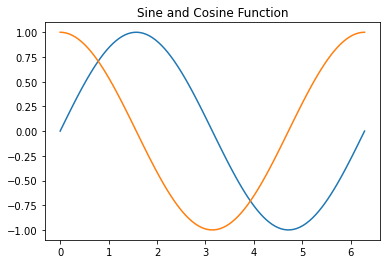

In [5]:
#Optional task
import matplotlib.pyplot as plt

plt.plot(trig, np.sin(trig))
plt.plot(trig, np.cos(trig))
plt.title('Sine and Cosine Function')

5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
ten_by_ten = np.array([i*j for i in range(1,11) for j in range(1,11)]).reshape(10,10)

print('\nOriginal 10 x 10 Multiplication Matrix:\n',ten_by_ten)

#Trace of the Matrix
trace = np.diag(ten_by_ten).sum()
print('\nTrace of the matrix:',trace)

#Anti-diagonal matrix
anti_diagonal = np.diag(ten_by_ten[::-1])
print('\nAnti-Diagonal Matrix:',anti_diagonal)

#Diagonal offset by 1
offset_diagonal = np.diag(ten_by_ten,k=1)
print('\nOffset-Diagonal Matrix:',offset_diagonal)


Original 10 x 10 Multiplication Matrix:
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

Trace of the matrix: 385

Anti-Diagonal Matrix: [10 18 24 28 30 30 28 24 18 10]

Offset-Diagonal Matrix: [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [7]:
dist_arr = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
num_cities = len(dist_arr)
grid = np.array([abs(i-j) for i in dist_arr for j in dist_arr]).reshape(num_cities,num_cities)

# 2D Grid
print('\n2D Grid of distances among each city along Route66:\n',grid)

# Distances in km
grid_km = grid * 1.60934 # 1 mile = 1.60934km
print('\n2D Grid with distances in km:\n',grid_km)


2D Grid of distances among each city along Route66:
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

2D Grid with distances in km:
 [[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [8]:
def is_prime(n):
    flag = True
    if n < 2:
        return False
    if n >= 2:
        for i in range(2,n):
            if (n%i == 0):
                flag = False
                break
    return flag

def getPrimes(x):
    num = np.arange(0,x)
    mask = [is_prime(x) for x in num]
    prime_numbers = num[mask]
    return prime_numbers

print(getPrimes(99))

%timeit getPrimes(9900)

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
1.56 s ± 90.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
# Sieve of Eratosthenes

def prime(n):
    num = np.arange(0,n)
    mask = [True] * n
    
    mask[0] = mask[1] = False
    
    p = 2
    for (i,prime) in enumerate(mask):
        if (i > p or p ==2 )and prime:
            p = i
            for i in range(2*p,n,p):
                mask[i] = False
    num = num[mask]   
    return num

print(prime(99)) 

%timeit prime(9900)

# Comment on the scaling of the two algorithms
# The first prime number computation scales quite poorly.
# The Sieve of Erasthothenes optimization improves performace significantly as can be seen when run for N = 9900.

# For N = 9900, the first method takes around 1.56s whereas the Sieve method yields a runtime of 2.06 ms, 
# which is a significant improvement.


[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
2.06 ms ± 50.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)


Walker_Distance:
 [  0  14  34  26 -14  -2 -12  10   2  -6  -2  16  38  -8  -4  14  -2  34
  -6 -12 -24 -14   6  14 -14  14  14  -2  10 -12 -22  -8 -36  -4   0  -6
   8 -14 -16 -12 -26  -8   2  32   8 -12 -12  22  16 -10  -2  16  14   0
 -16 -46  16  -6  24  18  36  18 -18   6  -2  -8   2   6   4  26  -8   0
 -20   4   2 -20   8   4  16 -14  -6   6   4 -20  20 -14  10  36  30  -4
  -6 -14   8  -4 -24 -18  -2  18 -14   4  12  -2  10   6 -10   4   8   4
   0 -34  28   2  -2  20 -22 -10   8  -2 -14   0  -6  -6 -16   2 -28   4
   4   0  -2 -16 -22 -60   2 -20   4   0  -6  10   8   0  -8  -4 -14   6
  -2   6  20  12  14  16   0 -12   8  -4 -16  16   0  -8  -2  -6   2  22
 -14 -10  12 -14  18  22 -22   6 -12  -6  -2 -10 -12 -10  30 -40  -2   8
 -22  20   2  12  10  -8 -18 -36  10  -6   4   2  -2  12 -10  20 -12   2
  26  16   6 -22  12 -16   2  30 -16 -16  -8  -4  -2  -2  -8 -12 -12   2
  -8   4 -10   8  -6   2 -10  22   6   2  18   0 -18  28   6 -18  10  14
 -14   4  14 -48  24 -22   4  -4

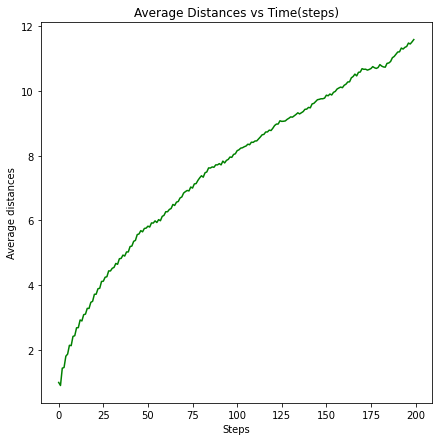

In [11]:
rnd_process = np.random.randint(low = -1,high = 1,size= (1000,200))
rnd_process[rnd_process == 0] = 1

walker_distance = np.sum(rnd_process, axis = 1)
walker_distance_sqr = np.square(walker_distance)

print('\nWalker_Distance:\n',walker_distance)
print('\nWalker_Distance Squared:\n',walker_distance_sqr)

#square the distance at each step
dist_at_each_step = np.cumsum(rnd_process, axis = 1)
dist_at_each_step_square = np.square(dist_at_each_step)

# print(dist_at_each_step)

#the mean along the columns
mean_square_distances = np.mean(dist_at_each_step_square, axis = 0)
print("\nThe mean of the squared distances at each step : \n", mean_square_distances)

#Plotting
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(200), np.mean(np.sqrt(dist_at_each_step_square),axis=0),'-g')
plt.xlabel('Steps')
plt.ylabel('Average distances')
plt.title('Average Distances vs Time(steps)')
plt.show()